In [4]:
import sample as sampler
import ironmask
import utils
import numpy as np
import math
from tqdm.auto import tqdm

In [5]:
def log2c_alpha(dimension, alpha):
    result = alpha
    for i in range(alpha):
        result += math.log2(dimension - i) - math.log2(i+1)
    return result    

In [ ]:
import itertools
dimension = 512
alpha = 4

# calculate the mean angle between random unit vector and its closest codeword

angle_list = []
iteration_times = 1000
random_codeword = sampler.sample_codeword(dimension, alpha)
nearby_templates = [random_codeword]
for i in tqdm(range(iteration_times)):
    tmp_matrix = utils.random_orthogonal_matrix(dimension)
    decode_vector = ironmask.decode_codeword(tmp_matrix @ random_codeword, dimension, alpha)
    nearby_templates.append(tmp_matrix.T @ decode_vector)

In [9]:
for codeword1, codeword2 in tqdm(itertools.combinations(nearby_templates, 2)):
    angle_list.append(utils.get_angle_of_two_vectors(codeword1, codeword2))

500500it [00:07, 64465.38it/s]

172.23767294263584
-0.9908368615816064


In [22]:
mean_angle = sum(angle_list) / len(angle_list)
print(mean_angle)
print(math.cos(mean_angle * math.pi / 180))
print(math.cos(mean_angle * math.pi / 180))
print(math.cos(75 * math.pi / 180) ** 2)

86.11883647131792
0.06768728986447002
0.06768728986447002
0.06698729810778066


In [6]:
dimension = 512
alpha = 5

# calculate the mean angle between random unit vector and its closest codeword

angle_list = []
iteration_times = 1000
for i in range(iteration_times):
    random_vector = sampler.random_unit_vector(dimension)
    decode_vector = ironmask.decode_codeword(random_vector, dimension, alpha)
    angle = utils.get_angle_of_two_vectors(random_vector, decode_vector)
    angle_list.append(angle)

mean_angle = sum(angle_list) / iteration_times
print(mean_angle)
print(math.cos(mean_angle * math.pi / 180))
max_angle = math.acos(math.sqrt(math.cos(mean_angle * math.pi / 180) / math.cos(22.56 * math.pi / 180)))
print(max_angle * 180 / math.pi)

73.49183242313082
0.2841520226335909
56.30960586356206


In [114]:
angle_list = []
iteration_times = 10000
success_times = 0
for i in range(iteration_times):
    random_vector = sampler.sample_codeword(dimension, alpha)
    noise_vector = sampler._generate_random_unit_vector_nearby(random_vector, math.tan(max_angle))
    decode_vector = ironmask.decode_codeword(noise_vector, dimension, alpha)
    if utils.get_angle_of_two_vectors(random_vector, decode_vector) < 0.1:
        success_times += 1
inner_angle = utils.get_angle_of_two_vectors(random_vector, noise_vector)
print(inner_angle)
print(math.cos(inner_angle  * math.pi / 180))
print(success_times / iteration_times)

56.322856701641854
0.5545124962591622
0.9998


In [112]:
theta_a = math.acos(math.cos(mean_angle * math.pi / 180) / math.cos(inner_angle * math.pi / 180))
print(theta_a * 180 / math.pi)
theta_i = math.acos(math.cos(inner_angle * math.pi / 180) / math.cos(theta_a))
print(theta_i * 180 / math.pi)

52.158562333387536
41.41812016314853


In [115]:
tmp_result = log2c_alpha(dimension, alpha)
print("log_2: ", tmp_result)

log_2:  43.06484885503582


In [123]:
import time 
import ironmask
iteration_times = 100000
start = time.time()

random_vector = sampler.random_unit_vector(dimension)
matrix = utils.random_orthogonal_matrix(dimension)

for _ in range(iteration_times):
    tmpw = matrix @ random_vector
    codeword = ironmask.decode_codeword(tmpw, dimension, alpha)

end = time.time()

print("elapsed time: {}", end - start)

elapsed time: {} 2.163334846496582


In [1]:
2.16 / 32 * 2 ** 83 / 2 / 1000 / 1000 / 60/ 60 / 24/ 365

10350392291.22114

In [104]:
# 99 % 的线
table_99_alpha_theta = [
    [5, 21.59],
    [4, 34.978],
]

# 95 % 的线
table_95_alpha_theta = [
    [7, 18.146],
    [6, 28.155],
    [5, 36.86],
    [4, 45.329],
]

# 90 % 的线
table_90_alpha_theta = [
    [9, 12.81],
    [8, 21.0],
    [7, 27.9],
    [6, 36.18],
    [5, 42.13],
    [4, 49.1],
]

# 30 % 的线
table_30_alpha_theta = [
    [16, 23.3],
    [15, 25.8],
    [14, 28.97],
    [13, 32.02],
    [12, 35.01],
    [11, 37.59],
    [10, 41.21],
    [9, 44.2],
    [8, 48.4],
    [7, 52.16],
    [6, 56.16],
    [5, 60.55],
    [4, 65.4],
]

# 10 % 的线
table_10_alpha_theta = [
    [16, 33.6],
    [15, 35.50],
    [14, 38.06],
    [13, 40.55],
    [12, 43.2],
    [11, 45.616],
    [10, 48.527],
    [9, 51.459],
    [8, 54.7],
    [7, 58.118],
    [6, 61.55],
    [5, 65.418],
    [4, 69.3],
]

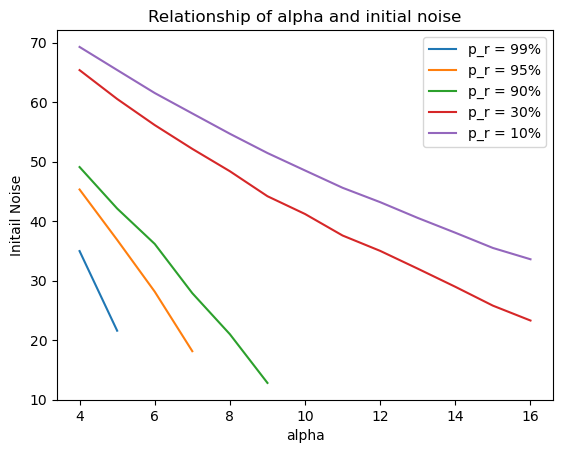

In [106]:
import matplotlib.pyplot as plt

plt.plot([pair[0] for pair in table_99_alpha_theta], [pair[1] for pair in table_99_alpha_theta], label='p_r = 99%')
plt.plot([pair[0] for pair in table_95_alpha_theta], [pair[1] for pair in table_95_alpha_theta], label='p_r = 95%')
plt.plot([pair[0] for pair in table_90_alpha_theta], [pair[1] for pair in table_90_alpha_theta], label='p_r = 90%')
plt.plot([pair[0] for pair in table_30_alpha_theta], [pair[1] for pair in table_30_alpha_theta], label='p_r = 30%')
plt.plot([pair[0] for pair in table_10_alpha_theta], [pair[1] for pair in table_10_alpha_theta], label='p_r = 10%')
plt.xlabel('alpha')
plt.ylabel('Initail Noise')
plt.title('Relationship of alpha and initial noise')
plt.legend()

# 保存图片，以pdf格式保存, dpi最大
plt.savefig('Relationship_alpha_noise.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()